<a href="https://colab.research.google.com/github/sudhanshuranjan277/Stock-price-prediction/blob/main/Google_Stock_Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yahoo_fin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.9 MB/s eta 0:00:00
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1257 sha256=1dbea4524bd09a24105d99424c7e5e7fa0767a163a7ff51b8f8ac07660505580
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6049 sha256=5ca10e8a799731990434a6314f75321b8fdbdb5d89c2c4dd6809657ac44ca2a2
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built bs4 sgmllib3k
  Attempting uninstall: urllib3
    Found exist

In [ ]:
import numpy as np
import time as tm
import datetime as dt
import tensorflow as tf

# Data preparation
from yahoo_fin import stock_info as yf
from sklearn.preprocessing import MinMaxScaler
from collections import deque

# AI
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Graphics library
import matplotlib.pyplot as plt

In [ ]:
# SETTINGS

# Window size or the sequence length, 7 (1 week)
N_STEPS = 7

# Lookup steps, 1 is the next day, 3 = after tomorrow
LOOKUP_STEPS = [1, 2, 3]

# Stock ticker, GOOGL
STOCK = 'GOOGL'

# Current date
date_now = tm.strftime('%Y-%m-%d')
date_3_years_back = (dt.date.today() - dt.timedelta(days=1104)).strftime('%Y-%m-%d')

In [ ]:
# LOAD DATA
# from yahoo_fin
# for 1104 bars with interval = 1d (one day)
init_df = yf.get_data(
    STOCK,
    start_date=date_3_years_back,
    end_date=date_now,
    interval='1d')

In [ ]:
init_df

,open,high,low,close,adjclose,volume,ticker
2020-11-20,88.099998,88.417999,86.750000,86.819000,86.819000,27694000,GOOGL
2020-11-23,87.011002,87.299500,85.509003,86.377998,86.377998,22530000,GOOGL
2020-11-24,86.375000,88.323997,86.036499,88.195000,88.195000,27984000,GOOGL
2020-11-25,88.390503,88.518997,87.417999,88.206497,88.206497,19600000,GOOGL
2020-11-27,88.226997,89.850502,88.226997,89.350998,89.350998,14790000,GOOGL
...,...,...,...,...,...,...,...
2023-11-21,136.289993,137.179993,135.960007,136.970001,136.970001,22635300,GOOGL
2023-11-22,137.470001,139.419998,137.470001,138.490005,138.490005,17813900,GOOGL
2023-11-24,138.029999,138.130005,135.990005,136.690002,136.690002,12514300,GOOGL
2023-11-27,136.029999,138.419998,136.000000,136.410004,136.410004,23436500,GOOGL


In [ ]:
# remove columns which our neural network will not use
init_df = init_df.drop(['open', 'high', 'low', 'adjclose', 'ticker', 'volume'], axis=1)
# create the column 'date' based on index column
init_df['date'] = init_df.index


In [ ]:
init_df

,close,date
2020-11-20,86.819000,2020-11-20
2020-11-23,86.377998,2020-11-23
2020-11-24,88.195000,2020-11-24
2020-11-25,88.206497,2020-11-25
2020-11-27,89.350998,2020-11-27
...,...,...
2023-11-21,136.970001,2023-11-21
2023-11-22,138.490005,2023-11-22
2023-11-24,136.690002,2023-11-24
2023-11-27,136.410004,2023-11-27


from matplotlib import pyplot as plt
_df_0['close'].plot(kind='hist', bins=20, title='close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['close']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('close')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['close']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('close')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['close'].plot(kind='line', figsize=(8, 4), title='close')
plt.gca().spines[['top', 'right']].set_visible(False)

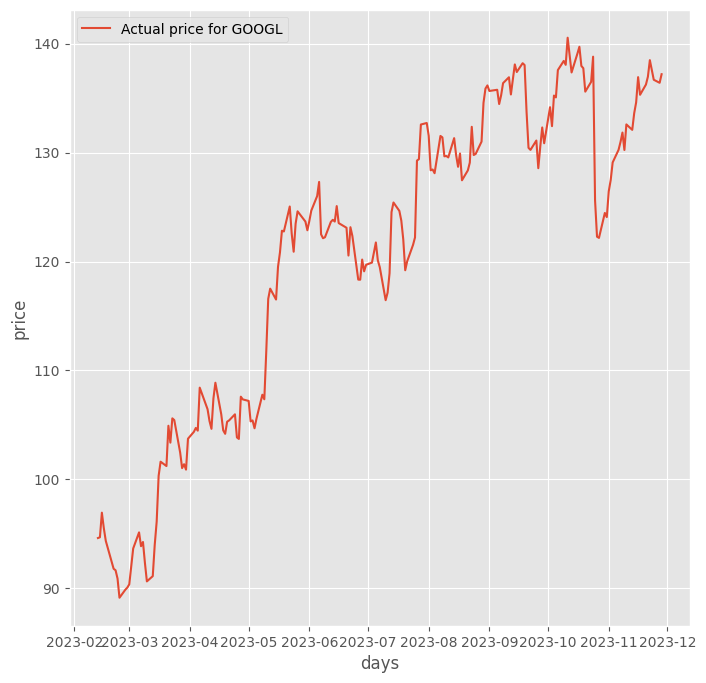

In [ ]:
# Let's preliminary see our data on the graphic
plt.style.use(style='ggplot')
plt.figure(figsize=(8, 8))
plt.plot(init_df['close'][-200:])
plt.xlabel('days')
plt.ylabel('price')
plt.legend([f'Actual price for {STOCK}'])
plt.show()

In [ ]:
# Scale data for ML engine
scaler = MinMaxScaler()
init_df['scaled_close'] = scaler.fit_transform(np.expand_dims(init_df['close'].values, axis=1))

In [ ]:
init_df

,close,date,scaled_close
2020-11-20,86.819000,2020-11-20,0.051033
2020-11-23,86.377998,2020-11-23,0.044392
2020-11-24,88.195000,2020-11-24,0.071753
2020-11-25,88.206497,2020-11-25,0.071926
2020-11-27,89.350998,2020-11-27,0.089160
...,...,...,...
2023-11-21,136.970001,2023-11-21,0.806222
2023-11-22,138.490005,2023-11-22,0.829111
2023-11-24,136.690002,2023-11-24,0.802006
2023-11-27,136.410004,2023-11-27,0.797789


In [ ]:
def PrepareData(days):
  df = init_df.copy()
  df['future'] = df['scaled_close'].shift(-days)
  last_sequence = np.array(df[['scaled_close']].tail(days))
  df.dropna(inplace=True)
  sequence_data = []
  sequences = deque(maxlen=N_STEPS)

  for entry, target in zip(df[['scaled_close'] + ['date']].values, df['future'].values):
      sequences.append(entry)
      if len(sequences) == N_STEPS:
          sequence_data.append([np.array(sequences), target])

  last_sequence = list([s[:len(['scaled_close'])] for s in sequences]) + list(last_sequence)
  last_sequence = np.array(last_sequence).astype(np.float32)

  # construct the X's and Y's
  X, Y = [], []
  for seq, target in sequence_data:
      X.append(seq)
      Y.append(target)

  # convert to numpy arrays
  X = np.array(X)
  Y = np.array(Y)

  return df, last_sequence, X, Y

In [ ]:
PrepareData(3) # 4 days

(                 close       date  scaled_close    future
 2020-11-20   86.819000 2020-11-20      0.051033  0.071926
 2020-11-23   86.377998 2020-11-23      0.044392  0.089160
 2020-11-24   88.195000 2020-11-24      0.071753  0.064600
 2020-11-25   88.206497 2020-11-25      0.071926  0.095440
 2020-11-27   89.350998 2020-11-27      0.089160  0.117733
 ...                ...        ...           ...       ...
 2023-11-16  136.929993 2023-11-16      0.805620  0.806222
 2023-11-17  135.309998 2023-11-17      0.781225  0.829111
 2023-11-20  136.250000 2023-11-20      0.795380  0.802006
 2023-11-21  136.970001 2023-11-21      0.806222  0.797789
 2023-11-22  138.490005 2023-11-22      0.829111  0.809685
 
 [756 rows x 4 columns],
 array([[0.75577664],
        [0.770835  ],
        [0.80561966],
        [0.78122526],
        [0.7953801 ],
        [0.8062221 ],
        [0.8291108 ],
        [0.80200577],
        [0.79778945],
        [0.80968547]], dtype=float32),
 array([[[0.0510326224007804

In [ ]:
def GetTrainedModel(x_train, y_train):
  model = Sequential()
  model.add(LSTM(60, return_sequences=True, input_shape=(N_STEPS, len(['scaled_close']))))
  model.add(Dropout(0.3))
  model.add(LSTM(120, return_sequences=False))
  model.add(Dropout(0.3))
  model.add(Dense(20))
  model.add(Dense(1))

  BATCH_SIZE = 8
  EPOCHS = 80

  model.compile(loss='mean_squared_error', optimizer='adam')

  model.fit(x_train, y_train,
            batch_size=BATCH_SIZE,
            epochs=EPOCHS,
            verbose=1)

  model.summary()

  return model

In [ ]:
# GET PREDICTIONS
predictions = []

for step in LOOKUP_STEPS:
  df, last_sequence, x_train, y_train = PrepareData(step)
  x_train = x_train[:, :, :len(['scaled_close'])].astype(np.float32)

  model = GetTrainedModel(x_train, y_train)

  last_sequence = last_sequence[-N_STEPS:]
  last_sequence = np.expand_dims(last_sequence, axis=0)
  prediction = model.predict(last_sequence)
  predicted_price = scaler.inverse_transform(prediction)[0][0]

  predictions.append(round(float(predicted_price), 2))

Epoch 1/80
94/94 [==============================] - 5s 9ms/step - loss: 0.0227
Epoch 2/80
94/94 [==============================] - 1s 10ms/step - loss: 0.0062
Epoch 3/80
94/94 [==============================] - 1s 11ms/step - loss: 0.0057
Epoch 4/80
94/94 [==============================] - 1s 14ms/step - loss: 0.0060
Epoch 5/80
94/94 [==============================] - 1s 14ms/step - loss: 0.0054
Epoch 6/80
94/94 [==============================] - 1s 14ms/step - loss: 0.0048
Epoch 7/80
94/94 [==============================] - 1s 11ms/step - loss: 0.0051
Epoch 8/80
94/94 [==============================] - 1s 10ms/step - loss: 0.0046
Epoch 9/80
94/94 [==============================] - 1s 10ms/step - loss: 0.0040
Epoch 10/80
94/94 [==============================] - 1s 10ms/step - loss: 0.0041
Epoch 11/80
94/94 [==============================] - 1s 10ms/step - loss: 0.0036
Epoch 12/80
94/94 [==============================] - 1s 10ms/step - loss: 0.0041
Epoch 13/80
94/94 [===================

In [ ]:
if bool(predictions) == True and len(predictions) > 0:
  predictions_list = [str(d)+'$' for d in predictions]
  predictions_str = ', '.join(predictions_list)
  message = f'{STOCK} prediction for upcoming 3 days ({predictions_str})'

  print(message)

GOOGL prediction for upcoming 3 days (136.74$, 138.08$, 135.41$)


In [ ]:
# Execute model for the whole history range
copy_df = init_df.copy()
y_predicted = model.predict(x_train)
y_predicted_transformed = np.squeeze(scaler.inverse_transform(y_predicted))
first_seq = scaler.inverse_transform(np.expand_dims(y_train[:6], axis=1))
last_seq = scaler.inverse_transform(np.expand_dims(y_train[-3:], axis=1))
y_predicted_transformed = np.append(first_seq, y_predicted_transformed)
y_predicted_transformed = np.append(y_predicted_transformed, last_seq)
copy_df[f'predicted_close'] = y_predicted_transformed

24/24 [==============================] - 0s 6ms/step


In [ ]:
copy_df

,close,date,scaled_close,predicted_close
2020-11-20,86.819000,2020-11-20,0.051033,91.188004
2020-11-23,86.377998,2020-11-23,0.044392,90.851501
2020-11-24,88.195000,2020-11-24,0.071753,90.566498
2020-11-25,88.206497,2020-11-25,0.071926,88.892998
2020-11-27,89.350998,2020-11-27,0.089160,88.382500
...,...,...,...,...
2023-11-21,136.970001,2023-11-21,0.806222,134.984512
2023-11-22,138.490005,2023-11-22,0.829111,136.108810
2023-11-24,136.690002,2023-11-24,0.802006,136.690002
2023-11-27,136.410004,2023-11-27,0.797789,136.410004


In [ ]:
# Add predicted results to the table
date_now = dt.date.today()
date_tomorrow = dt.date.today() + dt.timedelta(days=1)
date_after_tomorrow = dt.date.today() + dt.timedelta(days=2)

copy_df.loc[date_now] = [predictions[0], f'{date_now}', 0, 0]
copy_df.loc[date_tomorrow] = [predictions[1], f'{date_tomorrow}', 0, 0]
copy_df.loc[date_after_tomorrow] = [predictions[2], f'{date_after_tomorrow}', 0, 0]

<ipython-input-27-ca1349af6c77>:7: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  copy_df.loc[date_tomorrow] = [predictions[1], f'{date_tomorrow}', 0, 0]
<ipython-input-27-ca1349af6c77>:8: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  copy_df.loc[date_after_tomorrow] = [predictions[2], f'{date_after_tomorrow}', 0, 0]


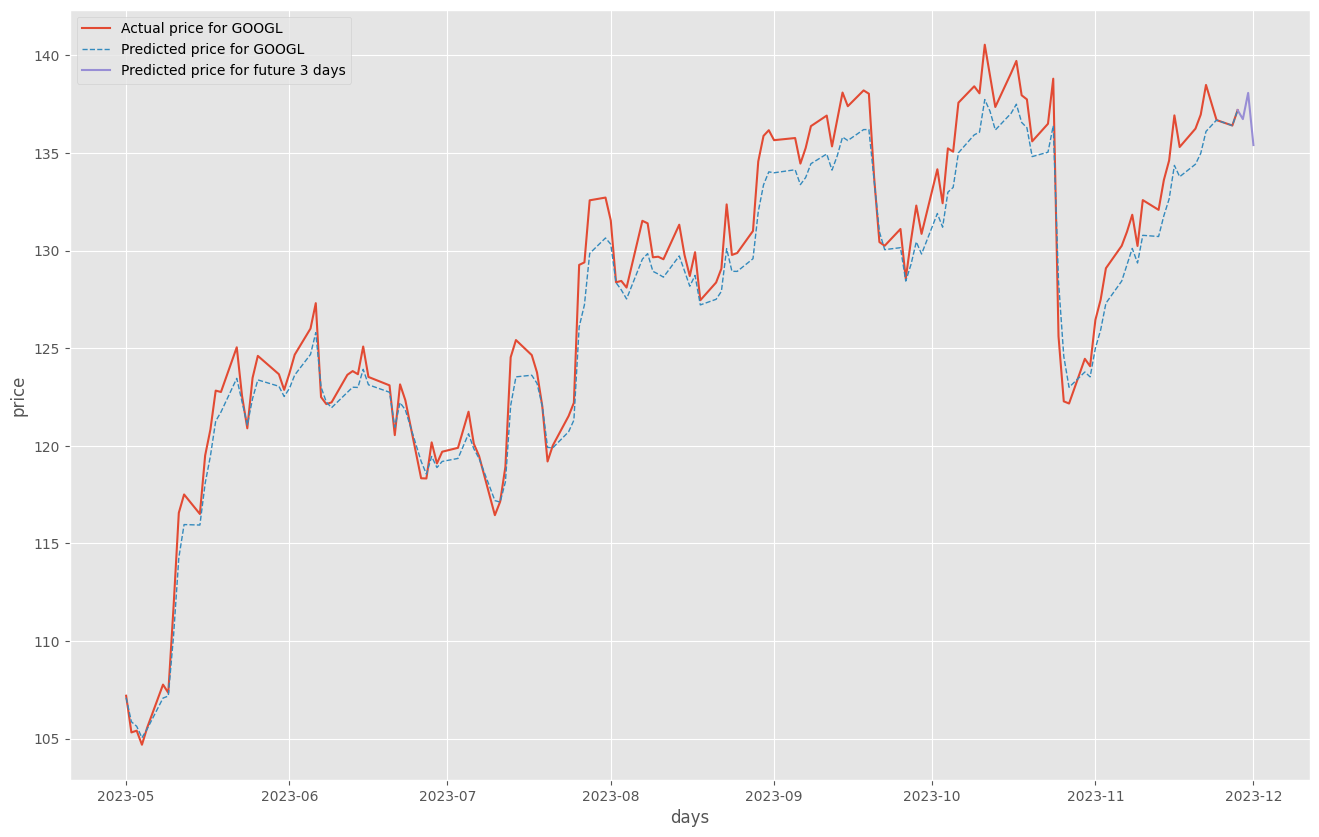

In [ ]:
# Result chart
plt.style.use(style='ggplot')
plt.figure(figsize=(16,10))
plt.plot(copy_df['close'][-150:].head(147))
plt.plot(copy_df['predicted_close'][-150:].head(147), linewidth=1, linestyle='dashed')
plt.plot(copy_df['close'][-150:].tail(4))
plt.xlabel('days')
plt.ylabel('price')
plt.legend([f'Actual price for {STOCK}',
            f'Predicted price for {STOCK}',
            f'Predicted price for future 3 days'])
plt.show()